
упр 1


In [1]:
import numpy as np

# Define the matrix M and the vector A
M = np.array([[1, -2, 3],
              [2, 3, -1],
              [0, -2, 1]])

A = np.array([7, 0, 7])

# Solve for X using numpy's linear algebra solver (np.linalg.solve)
X = np.linalg.solve(M, A)

# Print the result
print("Solution for X:")
print(X)


Solution for X:
[ 6. -5. -3.]


упр 2

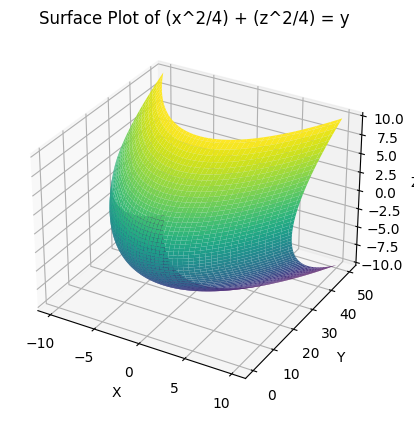

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Создаем данные
x = np.linspace(-10, 10, 100)
z = np.linspace(-10, 10, 100)
x, z = np.meshgrid(x, z)
y = (x**2 / 4) + (z**2 / 4)

# Создаем трехмерную область
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение поверхности
ax.plot_surface(x, y, z, cmap='viridis')

# Настройка отображения
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface Plot of (x^2/4) + (z^2/4) = y')

# Отображение графика
plt.show()


упр 3


In [5]:
import numpy as np

# Коэффициенты при переменных в левой части уравнений
coefficients = np.array([[-1, 2, 1, 1],
                         [-1, 2, 1, -1],
                         [-2, 4, 2, 4]])

# Значения в правой части уравнений
constants = np.array([2, -3, 9])

# Решение системы линейных уравнений (least squares solution)
solution, residuals, rank, singular_values = np.linalg.lstsq(coefficients, constants, rcond=None)

# Проверка решения
equations = np.allclose(np.dot(coefficients, solution), constants)

if equations:
    print("Система совместна и имеет решение:")
    print("Решение (x, y, z, t):", solution)
else:
    print("Система несовместна или имеет бесконечное количество решений.")


Система совместна и имеет решение:
Решение (x, y, z, t): [ 0.08333333 -0.16666667 -0.08333333  2.5       ]


упр 4


In [13]:
from sympy import symbols, Eq, solve

# Определение переменных
x, y, z, t = symbols('x y z t')

# Уравнение прямой L
line_equations = [
    Eq(x, 2 - 4*t),
    Eq(y, t),
    Eq(z, -3 + 2*t)
]

# Уравнение плоскости a
plane_equation = Eq(5*x - 6*y + 2*z - 10, 0)

# Решение уравнения прямой для t
t_solution = solve(line_equations, t)

# Подставим t в уравнения прямой для получения координат точек
points_on_line = [(line_equations[0].subs(t, sol), line_equations[1].subs(t, sol), line_equations[2].subs(t, sol)) for sol in t_solution]

# Подставим t в уравнения плоскости для определения взаимного расположения
positions = [plane_equation.subs({x: point[0], y: point[1], z: point[2]}) for point in points_on_line]

# Выведем результаты
for i, position in enumerate(positions):
    print(f"Точка {i+1} (x, y, z) =", points_on_line[i])
    if position == 0:
        print("Точка лежит в плоскости.")
    elif position > 0:
        print("Точка находится по одну сторону от плоскости.")
    else:
        print("Точка находится по другую сторону от плоскости.")
    print("не в одном плоскости")


Дополнительное задание

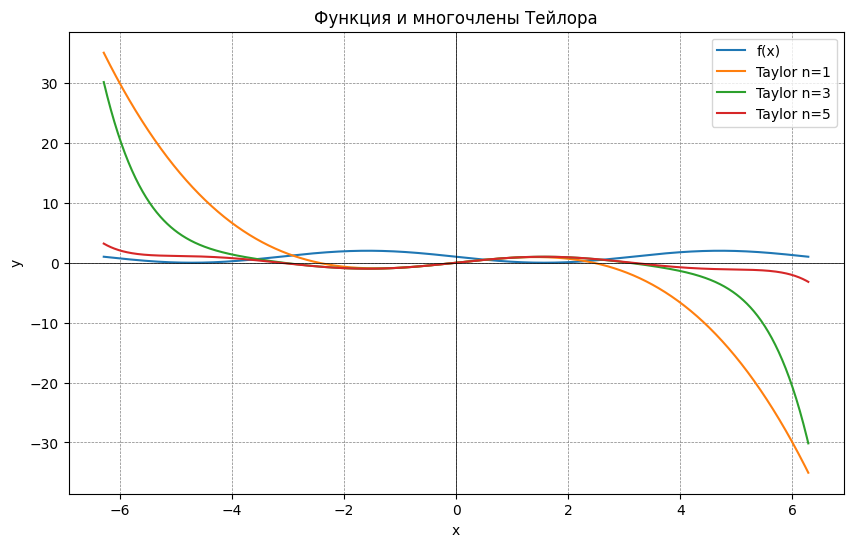

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Определение функции и её производных
def f(x):
    return 1 - np.sin(x)

def taylor_polynomial(x, n):
    result = 0
    for i in range(n + 1):
        result += (-1)**i * x**(2*i + 1) / np.math.factorial(2*i + 1)
    return result

# Генерация значений для x
x_values = np.linspace(-2*np.pi, 2*np.pi, 1000)

# Вычисление значений функции и многочленов Тейлора
y_function = f(x_values)
y_taylor_1 = taylor_polynomial(x_values, 1)
y_taylor_3 = taylor_polynomial(x_values, 3)
y_taylor_5 = taylor_polynomial(x_values, 5)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_function, label='f(x)')
plt.plot(x_values, y_taylor_1, label='Taylor n=1')
plt.plot(x_values, y_taylor_3, label='Taylor n=3')
plt.plot(x_values, y_taylor_5, label='Taylor n=5')

# Настройка отображения графика
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title("Функция и многочлены Тейлора")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
